<a href="https://colab.research.google.com/github/dduniverse/DF/blob/main/2nd%20project/%EB%A6%AC%EB%B7%B0%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('hanok.csv')
data.head()

,name,score,address,review
0,나비잠한옥호텔,4.5,전주시 완산구 팔달로 150-17,['침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 ...
1,한옥호텔궁,3.6,전주시 완산구 풍남문4길 25-19,['평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디션...
2,이가한옥,3.9,전주시 완산구 간납로 8,['숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따뜻...
3,정가한옥,3.8,전주시 완산구 기린대로 78-3,['어떤 방이 30분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 0시 50분.....
4,라온한옥꿀잠,4.3,전주시 완산구 한지길 99-6,[]


In [3]:
# review에서 문자만 남김
data['review'] = data['review'].str.replace('[', '').str.replace(']','').str.replace("\'", '')
data.head()

<ipython-input-3-39c065394a0c>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['review'] = data['review'].str.replace('[', '').str.replace(']','').str.replace("\'", '')


,name,score,address,review
0,나비잠한옥호텔,4.5,전주시 완산구 팔달로 150-17,침구상태가 최상은 아니었어요. 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 점이...
1,한옥호텔궁,3.6,전주시 완산구 풍남문4길 25-19,평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다. 룸 컨디션도 ...
2,이가한옥,3.9,전주시 완산구 간납로 8,숙소가 한옥이라 분위기 있음.작지만 뒷편에 주차장도 있음.샤워기 수압 쎄고 따뜻한 ...
3,정가한옥,3.8,전주시 완산구 기린대로 78-3,어떤 방이 30분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 0시 50분..시간...
4,라온한옥꿀잠,4.3,전주시 완산구 한지길 99-6,


In [4]:
# 한글 문자만 남김
data['review'] = data['review'].str.replace('[^가-힣]', ' ', regex = True)
data.head()

,name,score,address,review
0,나비잠한옥호텔,4.5,전주시 완산구 팔달로 150-17,침구상태가 최상은 아니었어요 또 휴지가 욕실에만 있고 객실에는 없어서 불편한 점이...
1,한옥호텔궁,3.6,전주시 완산구 풍남문4길 25-19,평일이라 룸 업그레이드도 받고 정말 조용하게 편하게 쉬었다 왔습니다 룸 컨디션도 ...
2,이가한옥,3.9,전주시 완산구 간납로 8,숙소가 한옥이라 분위기 있음 작지만 뒷편에 주차장도 있음 샤워기 수압 쎄고 따뜻한 ...
3,정가한옥,3.8,전주시 완산구 기린대로 78-3,어떤 방이 분 넘게 시끄러워서 퇴실 시간인 줄 알았는데 새벽 시 분 시간...
4,라온한옥꿀잠,4.3,전주시 완산구 한지길 99-6,


In [5]:
# !pip install konlpy

In [6]:
from konlpy.tag import *
kkma = Kkma()  # 형태소 분석기 꼬꼬마(Kkma)

nouns = data['review'].apply(kkma.nouns)  # 명사만 추출
nouns

0      [침구, 침구상태, 상태, 최상, 휴지, 욕실, 객실, 불편, 점, 방, 친절, 위...
1              [평일, 룸, 업그레이드, 컨디션, 최상, 유지, 담, 방문, 다, 사진]
2      [숙소, 한옥, 분위기, 있음, 뒷편, 주차장, 샤워기, 수압, 물, 난방, 방, ...
3      [방, 분, 퇴실, 시간, 줄, 새벽, 시, 가늠, 방문, 담배, 센스, 정도, 소...
4                                                     []
                             ...                        
104                                                   []
105                                                   []
106                                                   []
107         [내, 집, 편안, 근처, 향교, 전주, 전주천, 천, 태원, 등, 산책, 곳]
108                                                   []
Name: review, Length: 109, dtype: object

In [7]:
nouns = nouns.explode()  # 한 줄에 하나씩 나타나도록 전개
nouns

0        침구
0      침구상태
0        상태
0        최상
0        휴지
       ... 
107      태원
107       등
107      산책
107       곳
108     NaN
Name: review, Length: 2146, dtype: object

In [8]:
words = pd.DataFrame({'word':nouns})  # 데이터 프레임 형태로 변환
words

,word
0,침구
0,침구상태
0,상태
0,최상
0,휴지
...,...
107,태원
107,등
107,산책
107,곳


In [9]:
words['count'] = words['word'].str.len()  # 단어의 길이 저장

In [10]:
words = words.query('count >= 2')  # 길이가 2 이상인 단어만 가져옴
words

,word,count
0,침구,2.0
0,침구상태,4.0
0,상태,2.0
0,최상,2.0
0,휴지,2.0
...,...,...
107,향교,2.0
107,전주,2.0
107,전주천,3.0
107,태원,2.0


In [11]:
words = words.groupby('word', as_index = False).count().sort_values('count', ascending = False)  # 각 단어의 빈도수 계산
words

,word,count
800,친절,39
368,사장님,28
887,한옥,24
660,전주,19
427,숙소,18
...,...,...
458,식적,1
459,식칼,1
137,남편,1
461,신경안,1


In [12]:
words = words[5:] # 상위 5개는 의미가 없다고 생각해서 제거

In [13]:
# 데이터프레임을 딕셔너리 형태로 변환
words_dic = words.set_index('word').to_dict()['count']

In [14]:
from wordcloud import WordCloud
from PIL import Image

In [15]:
# 폰트 나눔을 코랩에 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [16]:
font = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [17]:
wc = WordCloud(width=1000, 
               height=600, 
               background_color="white", 
               random_state=0, 
               font_path=font)

img_wordcloud = wc.generate_from_frequencies(words_dic)

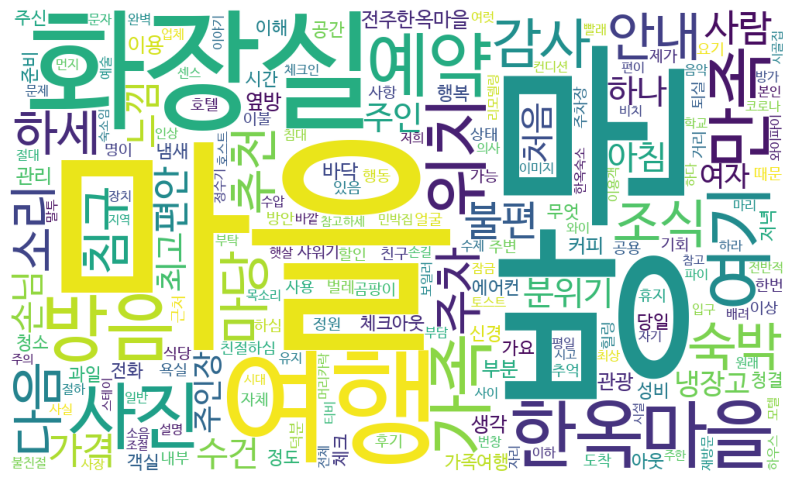

In [18]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

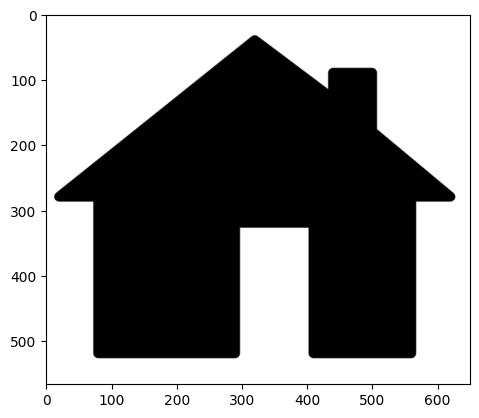

In [19]:
import PIL
img = PIL.Image.open('home.png')
plt.imshow(img)

In [20]:
mask = Image.new('RGB', img.size, (255,255,255))
mask.paste(img, img)
mask = np.array(mask)

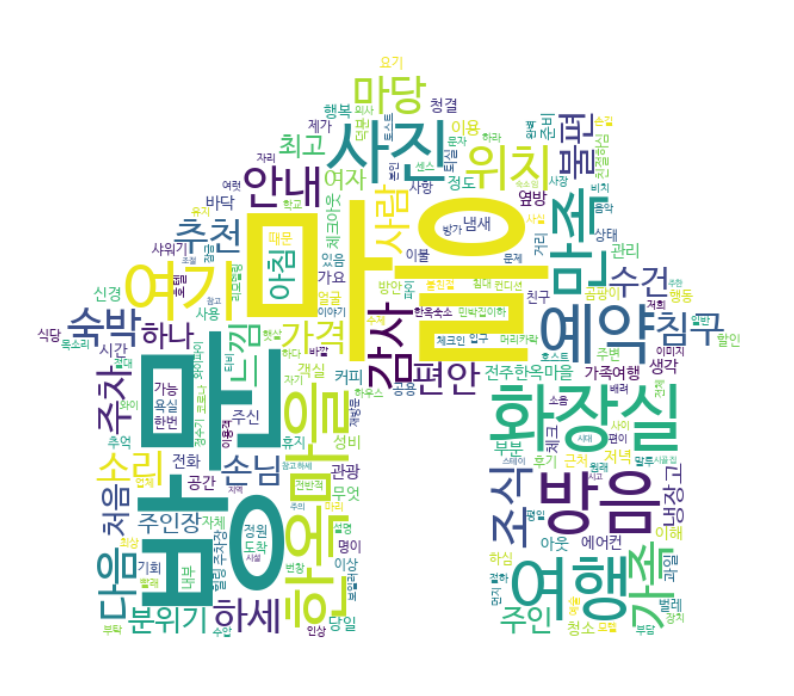

In [21]:
wc = WordCloud(width=1000, 
               height=600, 
               background_color="white", 
               random_state=0, 
               font_path=font,
               mask = mask,)

img_wordcloud = wc.generate_from_frequencies(words_dic)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_wordcloud, interpolation='bilinear')